In [1]:
import pathlib
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import time
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler


import multiprocessing
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)

2.3.1


In [2]:
from sklearn.metrics import make_scorer

In [3]:
import statsmodels

In [4]:
import glob

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [7]:
def polt(d1,d2):
    plt.figure(figsize = (30,10))
    plt.plot(d1, label = str(d1))
    plt.plot(d2, label = str(d2))
def imb(true,pred):
    return abs(true - pred).sum()/true.sum()    

In [8]:
polt(y_test.flatten(),pred,time, 'custom')

NameError: name 'y_test' is not defined

In [87]:
def rev(y_test,pred, price):
    sold = pred * price
    return sold.sum()

In [158]:
def pirnt(y_test,pred,name):
    
    y_test_s = y_test/4000
    pred_mixed_s = pred/4000

    
    imbalance = (np.round(imb_cost(y_true = y_test_s,y_pred = pred_mixed_s), 2))
    revenue = (np.round(rev(y_test_s,pred_mixed_s, DA_test), 2))
    
    print('Imbalance percentage - ' +  str(np.round(imb(y_test_s, pred_mixed_s) * 100 , 2)) + '%')
    print('Imbalance cost - €' + str(imbalance))
    print('Revenue - €' + str(revenue))
    print('Total Revenue - €' + str(np.round(imbalance + revenue, 2)))


In [159]:
def polt(y_test,pred,times,name):
    pos = list()
    neg = list()
    
    
    y_test_s = y_test/4000
    pred_mixed_s = pred/4000
    
    error =  (y_test_s - pred_mixed_s)
    
    for q in range(len(y_test_s)):
        if (y_test_s[q] - pred_mixed_s[q]) > 0:
            pos.append(y_test_s[q])
        else:
            pos.append(pred_mixed_s[q])
    for q in range(len(y_test_s)):
        if (y_test_s[q] - pred_mixed_s[q]) < 0:
            neg.append(y_test_s[q])
        else:
            neg.append(pred_mixed_s[q])
            
    error_pos = error[error > 0]
    error_neg = error[error < 0] 
    
    print(error_pos.sum(),error_neg.sum())
    
    imbalance = (np.round(imb_cost(y_true = y_test_s,y_pred = pred_mixed_s), 2))
    revenue = (np.round(rev(y_test_s,pred_mixed_s, DA_test), 2))
    
    plt.figure(figsize = (30,10))
    plt.plot(times, y_test_s, label = 'Actual')        
    plt.plot(times, pred_mixed_s, label = 'Forecast', color = 'green')
    plt.fill_between(times, (pos), (y_test_s), color='red', alpha=0.3, label = 'Shortage')
    plt.fill_between(times, (neg), (y_test_s), color='gold', alpha=0.3, label = 'Surplus')
    plt.text(x = np.min(times),y = y_test_s.max(),fontsize = 13 ,s = 'Imbalance percentage - ' +  str(np.round(imb(y_test_s, pred_mixed_s) * 100 , 2)) + '%')
    plt.text(x = np.min(times),y = y_test_s.max()*0.95,fontsize = 13 ,s = 'Imbalance cost - €' + str(imbalance))
    plt.text(x = np.min(times),y = y_test_s.max()*0.9,fontsize = 13 ,s = 'Revenue - €' + str(revenue))
    plt.text(x = np.min(times),y = y_test_s.max()*0.85,fontsize = 13 ,s = 'Total Revenue - €' + str(np.round(imbalance + revenue, 2)))
    plt.xlabel('Time')
    plt.ylabel('Power in MWh')
    plt.title(name +' vs. Actual')
    plt.legend()
def imb_cost(y_pred, y_true):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    error_sum = 0.0

    for i in range(len(y_pred)):
        
        err = (y_true[i] - y_pred[i])
        if err < 0:
            err = err * (ISP_test[i])
        else:
            err = err * (ISP_test[i])
        error_sum += err
    return error_sum
    
#loss_function = mean_absolute_percentage_error    

In [53]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor    

In [9]:
keras.initializers.zeros

tensorflow.python.keras.initializers.initializers_v2.Zeros

In [10]:
def build_model(input_shape):
    model = keras.Sequential([
    layers.Dense(units = 64
                 , activation= 'relu'
                 , input_shape=input_shape
                 , kernel_initializer = 'orthogonal'), 
    layers.Dense(units = 64, activation= 'relu'), 
    layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(0.001)
  
    model.compile(
                loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
file_list = glob.glob("../data/solar/*")

In [ ]:
file_list

In [ ]:
file_list[0]

In [ ]:
x

In [ ]:
for x in file_list:
    df_cur = pd.read_csv(x)[['TS_UTC_VON', 'ACTUAL', 'EisMan', 'DA_C', 'DA_E']]
    df_cur.columns = [df_cur.columns[0]] + [i + '_' + x[-10:-4] for i in df_cur.columns[1:]]
    data = data.merge(df_cur, on = 'TS_UTC_VON', how = 'outer')

In [ ]:
features = pd.Series(data.columns)[pd.Series(data.columns).str.startswith('DA')].values
targets = pd.Series(data.columns)[pd.Series(data.columns).str.startswith('ACTUAL')].values

In [ ]:
data = data_long['TS_UTC_VON'].drop_duplicates().reset_index(drop = True)

In [ ]:
data

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.to_csv('../data/solar/full_solar.csv', index = False)

In [ ]:
data['ACTUAL_201961'].dropna().plot()

In [ ]:
136 * 2 + 136

In [ ]:
solar.columns

In [ ]:
solar[solar['KW_ID'] == 200610][['TS_UTC_VON','ACTUAL', 'EisMan', 'DA_C', 'DA_E']]

In [ ]:
for i in wind['KW_ID'].drop_duplicates():
    wind[wind['KW_ID'] == i][['TS_UTC_VON','ACTUAL', 'EisMan', 'DA_C', 'DA_E']].to_csv('../data/wind_' + str(i) + '.csv', index = False)

In [ ]:
data.to_csv('../data/data_append_wind.csv')

In [ ]:
corr_matrix.to_csv('../data/corr_matrix_wind.csv')

In [ ]:
import networkx as nx

In [ ]:
nodes = list()
edges = list()
for i in corr_matrix.columns:
    nodes.append(i)
    edges.append(list(corr_matrix[corr_matrix[i] > .9][i].index))

In [ ]:
k = 0
for i in edges:
    if len(i) == 1:
        k += 1

In [ ]:
1 - (k/len(edges))

In [ ]:
Matrix_Graph = nx.Graph()
for k in range(len(nodes)):
    for i in edges[k]:
        Matrix_Graph.add_edge(nodes[k], i)

In [ ]:
print(nx.info(Matrix_Graph))
plt.figure(figsize = (20,20))
nx.draw(Matrix_Graph,with_labels = True)
plt.savefig('test_graph_70%.png', format = 'PNG')

In [13]:
wind_parks = pd.read_csv('../data/stamdata_wind_20201217.txt',decimal=',',sep = ';', error_bad_lines=False , encoding='latin-1')['Kraftwerk_ID']

In [14]:
solar_parks = pd.read_csv('../data/stamdata_solar_20201216.txt',decimal=',',sep = ';', error_bad_lines=False , encoding='latin-1')['Kraftwerk_ID']

In [12]:
price = pd.read_csv('../data/Prices.csv',decimal=',',sep = ';', error_bad_lines=False)

In [13]:
price = price.dropna()

In [14]:
price['Unnamed: 0'] = price['Unnamed: 0'].apply(lambda x: x.replace(' (b)',''))

In [15]:
price['date'] = price['Unnamed: 0'].apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y %H:%M'))

In [16]:
price = price.drop('Unnamed: 0', axis = 1)

In [17]:
price.columns = ['DA','ISP','Date']

In [434]:
price['DA'].rolling(20)

Rolling [window=20,center=False,axis=0]

In [ ]:
data = pd.read_csv('../data/data_append_wind.csv')

In [ ]:
ds = data[data[-(4464 + 2985):-2985].dropna(axis = 1).columns].dropna()

In [ ]:
data['date'] = data['TS_UTC_VON'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
merge = price.merge(ds, on = 'date')

In [ ]:
merge.dropna()

In [168]:
wind.to_csv('../data/wind/wind_long.csv', index = False)

In [169]:
solar.to_csv('../data/solar/solar_long.csv', index = False)

In [11]:
#solar = pd.read_csv('../data/solar/solar_long.csv')
wind = pd.read_csv('../data/wind/wind_long.csv')

In [19]:
data_long = pd.read_csv('../data/history.csv',decimal=',',sep = ';', error_bad_lines=False)

In [ ]:
data_long

In [ ]:
data_long = data_long.dropna()

In [ ]:
data_long = data_long.reset_index(drop = True)

In [20]:
data_long['wind'] = (data_long['KW_ID'].isin(data_long['KW_ID'].drop_duplicates()[data_long['KW_ID'].drop_duplicates().isin(wind_parks)])).astype(int)

In [21]:
data_long['solar'] = (data_long['KW_ID'].isin(data_long['KW_ID'].drop_duplicates()[data_long['KW_ID'].drop_duplicates().isin(solar_parks)])).astype(int)

In [ ]:
data_long['KW_ID'].isin(data_long['KW_ID'].drop_duplicates()[data_long['KW_ID'].drop_duplicates().isin(solar_parks)]).value_counts()

In [ ]:
data_long[(data_long['wind'] == 0) & (data_long['solar'] == 0)]['KW_ID'].drop_duplicates().to_csv('../data/no_indication.csv')

In [22]:
data_long.columns

Index(['TS_UTC_VON', 'KW_ID', 'ACTUAL', 'EisMan', 'DA_C', 'DA_E', 'wind',
       'solar'],
      dtype='object')

In [ ]:
for i in data_long[(data_long['solar'] == 1)]['KW_ID'].drop_duplicates():
    k = data_long[data_long['KW_ID'] == i]['ACTUAL'][:100]
    plt.figure()
    plt.plot(k, label = i)
    plt.legend()

In [23]:
data_long['Date'] = data_long['TS_UTC_VON'].apply(lambda a: datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S'))

In [24]:
data_long['year'] = data_long['Date'].dt.year

In [25]:
data_long = data_long.sort_values('Date').reset_index(drop = True)

In [31]:
data_long[(data_long['year'] == 2020) & data_long['solar'] == 1]['KW_ID'].drop_duplicates()

51192053    201994
51192054    201580
51192055    201976
51192056    201619
51192057    201850
             ...  
68924435    202203
68924635    202202
70791888    202186
70792105    202084
70792343    202191
Name: KW_ID, Length: 286, dtype: int64

In [42]:
sol_cut = data_long[(data_long['KW_ID'].isin(solar_parks[:5])) & (data_long['year'] == 2020)][['ACTUAL','DA_C','DA_E', 'KW_ID', 'Date']]

In [43]:
wind_cut = data_long[(data_long['KW_ID'].isin(wind_parks[:5])) & (data_long['year'] == 2020)][['ACTUAL','DA_C','DA_E', 'KW_ID', 'Date']]

In [33]:
solar_parks[:5]

0    200583
1    200586
2    200587
3    200592
4    200600
Name: Kraftwerk_ID, dtype: int64

In [ ]:
[201994,201580,201976,201619,201850]

In [ ]:
wind_parks_all = data_long[(data_long['solar'] == 0) & (data_long['DA_C'] != 0) & (data_long['hour'].isin([22,23,0,1,2]))]['KW_ID'].drop_duplicates()

In [ ]:
undecided = data_long[(data_long['KW_ID'].isin(wind_parks_all[wind_parks_all.isin(solar_parks_all)]))]

In [ ]:
solar = data_long[data_long['solar'] == 1]
solar['date'] = solar['TS_UTC_VON'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
wind = data_long[data_long['wind'] == 1]
wind['date'] = wind['TS_UTC_VON'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
for i in data_long['KW_ID'].drop_duplicates().values:
    data_long[str(i)] = (data_long['KW_ID'] == i).astype(int)

In [ ]:
data = data.sort_values('TS_UTC_VON').reset_index(drop = True)

In [ ]:
data[features]

In [ ]:
sc = MinMaxScaler()

In [ ]:
dl = sc.fit_transform(data_long[data_long.columns[1:]])

In [ ]:
data_long = data_long.sort_values('TS_UTC_VON').reset_index(drop = True)

In [ ]:
data_long = pd.concat(data_long,pd.get_dummies(data_long['KW_ID']))

In [ ]:
data_long['']

In [ ]:
data = pd.read_csv('../data/data_append_wind.csv', parse_dates = True)

In [ ]:
targets = pd.Series(data.columns)[pd.Series(data.columns).str.startswith('ACTUAL')].values

In [ ]:
d_act = data[targets]

In [ ]:
d_act.dropna(axis = 1)

In [ ]:
for k,i in enumerate(range(5415, len(d_act) + 5415, 5415)):
    locals()['d_act_' + str(k)] = d_act[i - 5415:i].dropna(axis = 1)

In [ ]:
d_act[i - 5415:i]

In [ ]:
print(7.131149e+07/len(data_long),7.131149e+07/len(data_long),1.618674e+06/len(data_long),7.122426e+07/len(data_long),6.827724e+07/len(data_long))

In [ ]:
wind

In [ ]:
data_long['ones'] = 1

In [ ]:
solar

In [ ]:
solar['year'] = solar['date'].dt.year
wind['year'] = wind['date'].dt.year

In [ ]:
solar[['year','ACTUAL']].groupby('year').sum().to_csv('../data/solar_prod.csv')

In [ ]:
sol_sum = solar.groupby('date').sum()
sol_sum['year'] = pd.Series(solar.groupby('date').sum().index).dt.year.values
wind_sum = wind.groupby('date').sum()
wind_sum['year'] = pd.Series(wind.groupby('date').sum().index).dt.year.values

In [208]:
sol_sum['month'] = sol_sum.reset_index()['date'].dt.month.values

In [207]:
wind_sum

KW_ID      ACTUAL  EisMan      DA_C      DA_E  wind  \
date                                                                          
2015-12-31 23:00:00  29697778  284540.600     0.0  293495.0       0.0   148   
2015-12-31 23:15:00  29697778  266578.936     0.0  296741.0       0.0   148   
2015-12-31 23:30:00  29697778  256563.668     0.0  300220.0       0.0   148   
2015-12-31 23:45:00  29697778  262015.012     0.0  302123.0       0.0   148   
2016-01-01 00:00:00  29697778  269364.180     0.0  300481.0       0.0   148   
...                       ...         ...     ...       ...       ...   ...   
2020-12-09 21:45:00  40079518  105179.624     0.0   92293.5  147604.0   199   
2020-12-09 22:00:00  40079518  115633.716     0.0   92333.0  147245.0   199   
2020-12-09 22:15:00  40079518  132596.868     0.0   92443.5  145484.0   199   
2020-12-09 22:30:00  40079518  143190.888     0.0   92520.0  144019.0   199   
2020-12-09 22:45:00  40079518  131884.960     0.0   92587.5  144780.0   199   

                     solar  year  month  
date                                     
2015-12-31 23:00:00      0  2015     12  
2015-12-31 23:15:00      0  2015     12  
2015-12-31 23:30:00      0  2015     12  
2015-12-31 23:45:00      0  2015     12  
2016-01-01 00:00:00      0  2016      1  
...                    ...   ...    ...  
2020-12-09 21:45:00      0  2020     12  
2020-12-09 22:00:00      0  2020     12  
2020-12-09 22:15:00      0  2020     12  
2020-12-09 22:30:00      0  2020     12  
2020-12-09 22:45:00      0  2020     12  

[173280 rows x 9 columns]

In [213]:
for i in range(1,13):
    cur = wind[(wind['year'] == 2020) & (wind['month'] == i)]
    print('Wind : Provider: DA_C, Month ' + str(i) + ',2020, imbalance:' + str(round((abs(cur['ACTUAL'] - cur['DA_C']).sum()/cur['ACTUAL'].sum() * 100), 2)) + '%')
    print('Wind : Provider: DA_E, Month ' + str(i) + ',2020, imbalance:' + str(round((abs(cur['ACTUAL'] - cur['DA_E']).sum()/cur['ACTUAL'].sum() * 100), 2)) + '%')

Wind : Provider: DA_C, Month 1,2020, imbalance:37.85%
Wind : Provider: DA_E, Month 1,2020, imbalance:45.72%
Wind : Provider: DA_C, Month 2,2020, imbalance:37.6%
Wind : Provider: DA_E, Month 2,2020, imbalance:43.22%
Wind : Provider: DA_C, Month 3,2020, imbalance:39.53%
Wind : Provider: DA_E, Month 3,2020, imbalance:47.05%
Wind : Provider: DA_C, Month 4,2020, imbalance:43.56%
Wind : Provider: DA_E, Month 4,2020, imbalance:52.36%
Wind : Provider: DA_C, Month 5,2020, imbalance:44.86%
Wind : Provider: DA_E, Month 5,2020, imbalance:53.67%
Wind : Provider: DA_C, Month 6,2020, imbalance:56.18%
Wind : Provider: DA_E, Month 6,2020, imbalance:64.41%
Wind : Provider: DA_C, Month 7,2020, imbalance:50.1%
Wind : Provider: DA_E, Month 7,2020, imbalance:60.15%
Wind : Provider: DA_C, Month 8,2020, imbalance:53.81%
Wind : Provider: DA_E, Month 8,2020, imbalance:61.06%
Wind : Provider: DA_C, Month 9,2020, imbalance:51.28%
Wind : Provider: DA_E, Month 9,2020, imbalance:59.79%
Wind : Provider: DA_C, Month 1

In [ ]:
abs(solar[['Date', 'ACTUAL']].groupby('Date').sum()['ACTUAL'] - solar[['Date', 'DA_E']].groupby('Date').sum()['DA_E']).sum()/solar[['Date', 'ACTUAL']].groupby('Date').sum()['ACTUAL'].sum()

In [ ]:
features = data_long.columns[4:]

In [ ]:
features =list( pd.Series(data.columns)[pd.Series(data.columns).str.startswith('DA')])
targets = list(pd.Series(data.columns)[pd.Series(data.columns).str.startswith('ACTUAL')])

In [ ]:
for i in targets:
    locals()['features_' + i.replace('ACTUAL_','')] = data.iloc[data[i].dropna().index].dropna(axis = 1).columns[data.iloc[data[i].dropna().index].dropna(axis = 1).columns.isin(features)]
    locals()['targets_' + i.replace('ACTUAL_','')] = [i]
    model_data_cur = data[locals()['features_' + i.replace('ACTUAL_','')] + list(locals()['targets_' + i.replace('ACTUAL_','')])].dropna()

In [ ]:
model_data_cur = data[locals()['features_' + i.replace('ACTUAL_','')] + list(locals()['targets_' + i.replace('ACTUAL_','')])].dropna()

In [ ]:
X_train  = model_data_cur[:int(len(model_data_cur) * .8)]
y_train  = model_data_cur[:int(len(model_data_cur) * .8)][targets_200586]
X_test  = model_data_cur[int(len(model_data_cur) * .8):]
y_test  = model_data_cur[int(len(model_data_cur) * .8):][targets_200586]

In [ ]:
targets_200586[0] + ' ~'

In [22]:
import statsmodels.formula.api as smf
import statsmodels as sm

In [ ]:
model_str = targets_200586[0] + ' ~ '
for i in features_200586:
    model_str += (' + ' + i)

In [ ]:
connections = list()
for i in targets:
    locals()['features_' + i.replace('ACTUAL_','')] = data.iloc[data[i].dropna().index].dropna(axis = 1).columns[data.iloc[data[i].dropna().index].dropna(axis = 1).columns.isin(features)]
    locals()['targets_' + i.replace('ACTUAL_','')] = [i]
    model_data_cur = data[list(locals()['features_' + i.replace('ACTUAL_','')]) + list(locals()['targets_' + i.replace('ACTUAL_','')])].dropna()
    
    model_str = locals()['targets_' + i.replace('ACTUAL_','')][0] + ' ~ '
    
    for x in locals()['features_' + i.replace('ACTUAL_','')]:
        model_str += (' + ' + x)
        
    #model train
    model = smf.ols(formula=model_str, data = model_data_cur)
    mode_fit = model.fit()
    
    results_fr = model.fit_regularized(L1_wt=1, alpha=0, start_params=mode_fit.params)
    final = sm.regression.linear_model.OLSResults(model, 
                                                  results_fr.params, 
                                                  model.normalized_cov_params)
    #model forecast
    asd= list(final.params.iloc[final.pvalues < 0.05].index)
    try:
        asd.remove('Intercept')
    except:
        pass
    connections.append(asd)

In [ ]:
solar.columns

In [ ]:
solar = solar[['KW_ID', 'ACTUAL', 'DA_C', 'DA_E', 'Date']].dropna()

In [ ]:
solar = solar.merge(price, on = 'Date')

In [ ]:
targets[0]

In [ ]:
for k,i in enumerate(connections):
    solar[targets[k]] = solar['KW_ID'].isin(np.unique([int(x[5:]) for x in i])).astype(int)

In [ ]:
solar

In [ ]:
connections

In [ ]:
locals()['features_' + i.replace('ACTUAL_','')]

In [ ]:
list(locals()['targets_' + i.replace('ACTUAL_','')])

In [ ]:
model_data_cur = data[list(locals()['features_' + i.replace('ACTUAL_','')]) + list(locals()['targets_' + i.replace('ACTUAL_','')])].dropna()

In [ ]:
plt.plot(y_test)
plt.plot(mode_fit.predict(X_test))

In [ ]:
y_test.values.reshape(-1,).sum()

In [ ]:
abs(y_test.values.reshape(-1,) - mode_fit.predict(X_test)).sum()/y_test.sum()

In [ ]:
abs(y_test.values.reshape(-1,) - X_test['DA_E_200587'].values.reshape(-1,)).sum()/y_test.sum()

In [ ]:
X_test

In [ ]:
print(list(final.params.iloc[final.pvalues < 0.05].index).append(targets[0]))

In [ ]:
targets[0]

In [ ]:
asd= list(final.params.iloc[final.pvalues < 0.05].index)

In [ ]:
asd.append('Intercept')

In [ ]:
asd= list(final.params.iloc[final.pvalues < 0.05].index)
try:
    asd.remove('Intercept')
except:
    pass

In [ ]:
asd

In [ ]:
if 'Intercept' in list(final.params.iloc[final.pvalues < 0.05].index):
    print(True)

In [ ]:
final.summary()

In [ ]:
merge[targets + features]

In [ ]:
data_short.plot()

In [ ]:
sc = MinMaxScaler()

In [ ]:
features

In [ ]:
data_short[]

In [ ]:
merge.dropna()

In [ ]:
dl = sc.fit_transform(merge[targets + features])

In [ ]:
dl = dl[:5677]

In [ ]:
merge[['date', 'Imbalance Price (Euro/MWh)']].dropna()

In [ ]:
merge['Imbalance Price (Euro/MWh)'][int(len(data_short) * .8):]

In [ ]:
solar.to_csv('../data/solar/added_connections.csv', index = False)

In [ ]:
solar['ACTUAL']

In [ ]:
solar.drop('Date', axis = 1)

In [ ]:
solar = solar.drop('Date',axis = 1)

In [ ]:
wind

In [30]:
wind['date']

0           2017-01-01 10:00:00
1           2017-01-01 11:00:00
2           2017-01-01 09:45:00
3           2017-01-01 09:00:00
4           2017-01-04 17:15:00
                   ...         
37633946    2020-12-08 13:00:00
37633947    2020-12-07 18:30:00
37633948    2020-12-08 14:45:00
37633949    2020-12-06 23:30:00
37633950    2020-12-07 21:15:00
Name: date, Length: 37633951, dtype: object

In [18]:
wind['date'] = pd.to_datetime(wind['date'], format='%Y-%m-%d %H:%M:%S')

In [33]:
solar['date'] = pd.to_datetime(solar['date'], format='%Y-%m-%d %H:%M:%S')

In [23]:
wind_20 = wind[wind['year'] == 2020].sort_values('date').reset_index(drop = True)[['KW_ID','ACTUAL','DA_E','DA_C','date']]

In [24]:
merge_w = price.merge(wind_20, left_on = 'Date', right_on = 'date')

In [41]:
merge_s = price.merge(solar[['KW_ID','ACTUAL','DA_E','DA_C','date','year']], left_on = 'Date', right_on = 'date')

In [33]:
cur = merge_w[merge_w['KW_ID'].isin(merge_w['KW_ID'].value_counts()[:20].index)].reset_index(drop = True)

In [59]:
cur[cur['KW_ID'] == i]

[0           False
 1           False
 2           False
 3           False
 4           False
             ...  
 36271025    False
 36271026    False
 36271027    False
 36271028    False
 36271029    False
 Name: KW_ID, Length: 36271030, dtype: bool]

In [44]:
wind_ids = pd.DataFrame()

In [61]:
 cur['KW_ID'].drop_duplicates()[cur['KW_ID'].drop_duplicates() == i]

20740627    201934
Name: KW_ID, dtype: int64

In [34]:
cur

DA     ISP       Date   KW_ID   ACTUAL    DA_E    DA_C       date
0       37.39  160.40 2020-01-01  201649   425.20   512.0   260.0 2020-01-01
1       37.39  160.40 2020-01-01  201492    60.48    87.0    44.0 2020-01-01
2       37.39  160.40 2020-01-01  201684   976.00   599.0   754.0 2020-01-01
3       37.39  160.40 2020-01-01  201532   752.64  3087.0  1092.0 2020-01-01
4       37.39  160.40 2020-01-01  201504   402.24   671.0   397.0 2020-01-01
...       ...     ...        ...     ...      ...     ...     ...        ...
585615  22.74   38.65 2020-11-01  201721   240.12   650.0   452.0 2020-11-01
585616  22.74   38.65 2020-11-01  201532     0.00  8636.0  4305.0 2020-11-01
585617  22.74   38.65 2020-11-01  201717  1338.72  1431.0   848.0 2020-11-01
585618  22.74   38.65 2020-11-01  201535  3210.88  5540.0  4220.0 2020-11-01
585619  22.74   38.65 2020-11-01  201520  2922.24  1839.0  1617.0 2020-11-01

[585620 rows x 8 columns]

In [39]:
cur = cur.merge(wind_ids,left_index = True, right_index = True)

In [186]:
indek = merge_w[merge_w['KW_ID'].isin(list(wind_ids.columns))].index

In [209]:
cur = merge_w[merge_w['KW_ID'].isin(list(wind_ids.columns[:15]))]

In [35]:
wind_ids = pd.DataFrame()

In [36]:
for i in cur['KW_ID'].drop_duplicates():
    wind_ids[str(i)] = (cur['KW_ID'] == i).astype(int)

array([False,  True, False, ..., False, False, False])

In [144]:
wind 

TS_UTC_VON   KW_ID  ACTUAL       EisMan    DA_C    DA_E  \
0         2017-01-01 10:00:00  201192   28.00  1152.000000  1588.0     NaN   
1         2017-01-01 11:00:00  201193    0.00   932.000000  1247.0     NaN   
2         2017-01-01 09:45:00  201192   32.00  1148.000000  1575.0     NaN   
3         2017-01-01 09:00:00  200805    0.00   700.000000  1084.0  1172.0   
4         2017-01-04 17:15:00  201192    0.00  1498.664444  1131.0  2057.0   
...                       ...     ...     ...          ...     ...     ...   
37633946  2020-12-08 13:00:00  201652  162.72          NaN   294.0    85.0   
37633947  2020-12-07 18:30:00  201853  672.00          NaN  1448.0  2338.0   
37633948  2020-12-08 14:45:00  200872    8.40          NaN    13.0     6.0   
37633949  2020-12-06 23:30:00  201795   36.00          NaN   103.0   236.0   
37633950  2020-12-07 21:15:00  201277  384.00          NaN   310.0   496.0   

          wind  solar                date  year  
0            1      0 2017-01-01 10:00:00  2017  
1            1      0 2017-01-01 11:00:00  2017  
2            1      0 2017-01-01 09:45:00  2017  
3            1      0 2017-01-01 09:00:00  2017  
4            1      0 2017-01-04 17:15:00  2017  
...        ...    ...                 ...   ...  
37633946     1      0 2020-12-08 13:00:00  2020  
37633947     1      0 2020-12-07 18:30:00  2020  
37633948     1      0 2020-12-08 14:45:00  2020  
37633949     1      0 2020-12-06 23:30:00  2020  
37633950     1      0 2020-12-07 21:15:00  2020  

[37633951 rows x 10 columns]

In [324]:
cur = merge_w[merge_w['KW_ID'] == 200023].dropna().reset_index(drop = True)

In [41]:
features = ['DA_C', 'DA_E'] + list(wind_ids.columns)
labels = ['ACTUAL']

In [154]:
ISP = cur['ISP'][:526020].reset_index(drop = True).values
ISP_test = cur['ISP'][526020:].reset_index(drop = True).values
DA = cur['DA'][:526020].reset_index(drop = True).values
DA_test = cur['DA'][526020:].reset_index(drop = True).values

In [165]:
sc = MinMaxScaler()
cur_s = sc.fit_transform(cur[labels +  features])

In [175]:
cur_s = cur[labels +  features].values

In [172]:
X_train  = cur_s[:526020,len(labels):]
y_train  = cur_s[:526020,:len(labels)]
X_test  = cur_s[526020:,len(labels):]
y_test  = cur_s[526020:,:len(labels)]

In [176]:
cur_s

array([[ 425.2 ,  260.  ,  512.  , ...,    0.  ,    0.  ,    0.  ],
       [  60.48,   44.  ,   87.  , ...,    0.  ,    0.  ,    0.  ],
       [ 976.  ,  754.  ,  599.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [1338.72,  848.  , 1431.  , ...,    0.  ,    0.  ,    0.  ],
       [3210.88, 4220.  , 5540.  , ...,    0.  ,    0.  ,    0.  ],
       [2922.24, 1617.  , 1839.  , ...,    0.  ,    0.  ,    0.  ]])

In [167]:
len(X_train) == len(y_train) == len(ISP) == len(DA)

True

In [168]:
len(X_test) == len(y_test) == len(ISP_test) == len(DA_test)

True

In [ ]:
from keras.layers import Dropout

In [131]:
class custom_metric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0
        sold_sum = 0.0

        for i in range(len(approx)):
            
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            
            err = (target[i] - approx[i])
            
            if err > 0 :
                error_sum += err * ISP[i]
                sold_sum += approx[i] * DA[i]
            elif err < 0 :
                error_sum += err * ISP[i]
                sold_sum += approx[i] * DA[i]
        
        rev_sum = error_sum + sold_sum
        return error_sum, weight_sum

class custom_loss(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)
        
        result = []
        rev = 0
        for index in range(len(targets)):
            der1 = (targets[index] - approxes[index])
            if der1 < 0:
                der1 = der1*ISP[index]
                rev = approxes[index] * DA[index]
            elif der1 > 0:
                der1 =  der1* ISP[index] 
                rev = approxes[index] * DA[index]
            der1 = der1 + rev
            der2 = -1

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result

In [79]:
# user define objective function, given prediction, return gradient and second
# order gradient this is log likelihood loss
def IMB_obj(preds, dtrain):
    
    print(len(dtrain),dtrain.shape)
    targets = dtrain
    grad = list()
    for index in range(len(targets)):
        grad_ele = (targets[index] - preds[index])
        if grad_ele < 0:
            grad_ele = grad_ele*ISP[index]
        elif grad_ele > 0:
            grad_ele = grad_ele*ISP[index]
        grad.append(grad_ele)
    grad = np.array(grad)
    hess = -1
    return grad, hess


# user defined evaluation function, return a pair metric_name, result

# NOTE: when you do customized loss function, the default prediction value is
# margin, which means the prediction is score before logistic transformation.
def IMB_error(preds, dtrain):
    labels = dtrain.get_label()
    err = (labels[i] - preds[i])
    
    error_sum = 0.0
    
    if err > 0 :
        error_sum += err * ISP[i]
    elif err < 0 :
        error_sum += err * ISP[i]
    # return a pair metric_name, result. The metric name must not contain a
    # colon (:) or a space
    return 'my-error', error_sum

In [80]:
a = np.array([1,3,7,3,5])
b = np.array([2,3,4,4,7])
c = np.array([2,1,1,2,2])

In [153]:
ISP

0         160.40
1         160.40
2         160.40
3         160.40
4         160.40
           ...  
526015     46.34
526016     46.34
526017     46.34
526018     46.34
526019     46.34
Name: ISP, Length: 526020, dtype: float64

In [160]:
def IMB_sk_loss(y, y_pred,ISP = ISP,DA = DA):
    err = (y - y_pred)
    error_sum =  np.sum(err * ISP) + np.sum(y_pred * DA)
    
    # return a pair metric_name, result. The metric name must not contain a
    # colon (:) or a space
    return 'my-error', error_sum

In [161]:
imb_scorer = make_scorer(IMB_sk_loss, greater_is_better = False)

Only ISP + DA, greater is better = True
13105.524250054588 -2156.875113167869


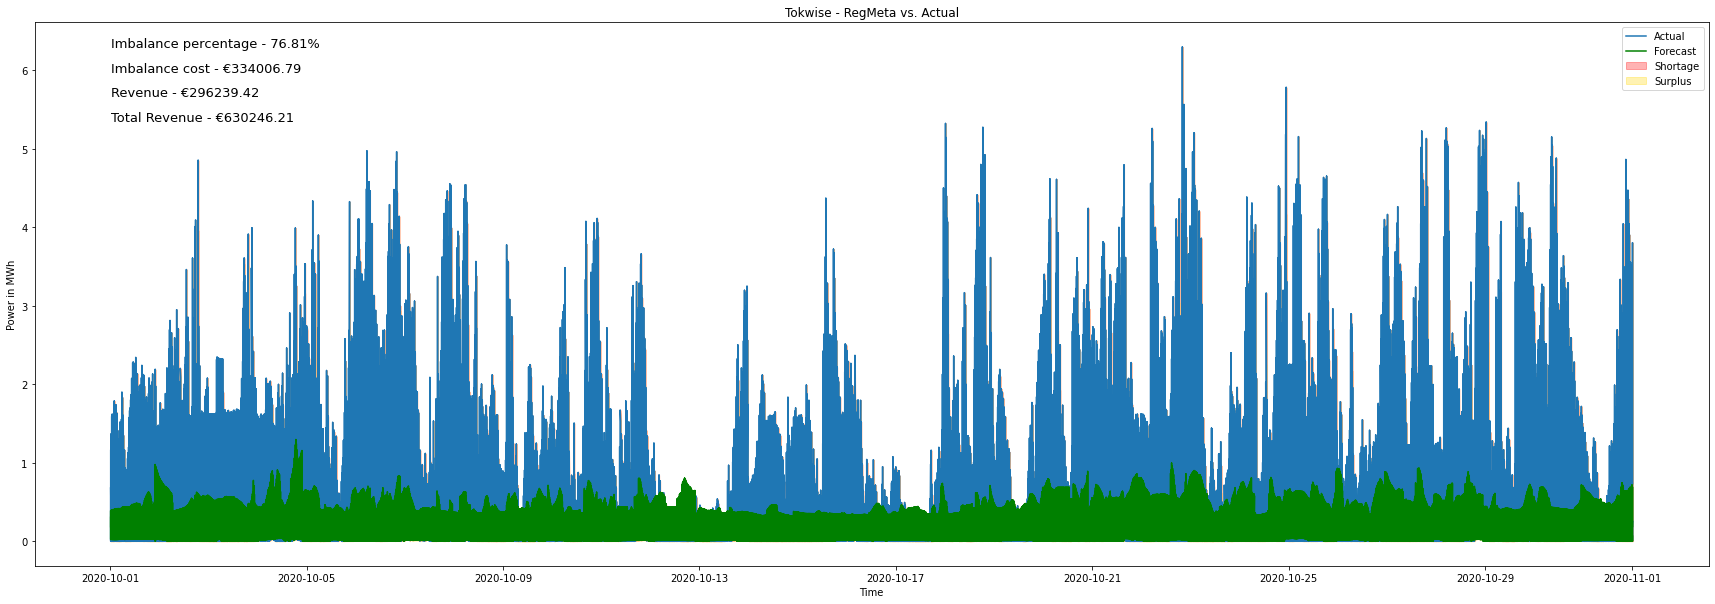

In [162]:
print('Only ISP + DA, greater is better = True')
reg = RidgeCV(alphas = np.arange(0.01,1,0.01),fit_intercept=False, scoring = imb_scorer)
reg.fit(X_train, y_train)
pred_reg = reg.predict(X_test)
pred_reg[pred_reg < 0] = 0
pred_reg
polt(y_test.flatten(), pred_reg.flatten(),time, 'Tokwise - RegMeta')

Only ISP + DA, greater is better = False
13105.524250054588 -2156.875113167869


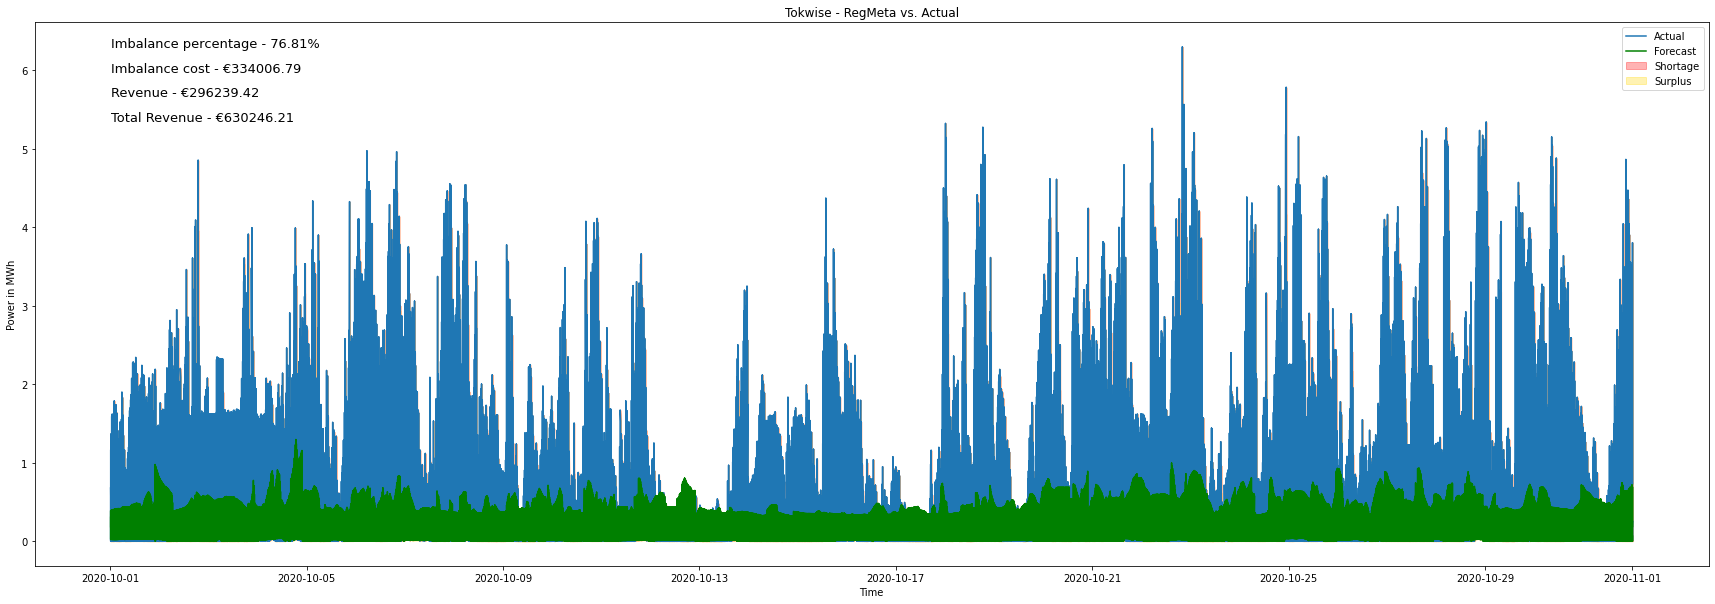

In [96]:
print('Only ISP + DA, greater is better = False')
reg = RidgeCV(alphas = np.arange(0.01,1,0.01),fit_intercept=False, scoring = imb_scorer)
reg.fit(X_train, y_train)
pred_reg = reg.predict(X_test)
pred_reg[pred_reg < 0] = 0
pred_reg
polt(y_test.flatten(), pred_reg.flatten(),time, 'Tokwise - RegMeta')

In [ ]:
def build_model(input_shape):
    model = keras.Sequential([
    layers.Dense(units = 512
                 , activation= 'relu'
                 , input_shape=input_shape
                 , kernel_initializer = 'GlorotNormal'), 
    layers.Dropout(0.2),
    layers.Dense(units = 264, activation= 'relu'), 
    layers.Dropout(0.2),
    layers.Dense(len(targets))])
    optimizer = tf.keras.optimizers.Adam(0.005)
  
    model.compile(
                loss=IMB_error,
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model([X_train.shape[1]])

In [ ]:



model.fit(X_train, y_train,
          epochs=25, validation_split = 0.10, verbose = 0)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor as mor

In [69]:
ISP[230]

26.18

In [134]:
regr = CatBoostRegressor(iterations=750,learning_rate=0.00005,depth=9,loss_function=custom_loss(), eval_metric = custom_metric(), verbose = 50)

In [135]:
regr.fit(X_train[:32000], y_train[:32000], eval_set=(X_train[32000:],y_train[32000:]))

0:	learn: 710025988.9377967	test: 161455257.6471692	best: 161455257.6471692 (0)	total: 1.74s	remaining: 21m 41s
50:	learn: 630501914.8921615	test: 146537635.3809429	best: 161455257.6471692 (0)	total: 1m 32s	remaining: 21m 1s


CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/python-package/catboost/helpers.cpp:42: Traceback (most recent call last):
  File "_catboost.pyx", line 1344, in _catboost._ObjectiveCalcDersRange
  File "<ipython-input-131-11ba44a948fd>", line 36, in calc_ders_range
    def calc_ders_range(self, approxes, targets, weights):
KeyboardInterrupt


In [211]:
regr_norm = CatBoostRegressor(iterations=2000,learning_rate=0.01,depth=16, verbose = 500)

In [ ]:
regr_norm.fit(X_train[:526020], y_train[:526020], eval_set=(X_train[506020:],y_train[506020:]) , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1869.7190878	test: 1447.8320551	best: 1447.8320551 (0)	total: 816ms	remaining: 27m 11s
500:	learn: 1227.0011450	test: 881.4810815	best: 881.4810815 (500)	total: 6m 48s	remaining: 20m 21s
1000:	learn: 1217.4729001	test: 873.3505996	best: 873.3505996 (1000)	total: 13m 26s	remaining: 13m 25s
1500:	learn: 1210.9031437	test: 869.6660738	best: 869.6660738 (1500)	total: 20m 10s	remaining: 6m 42s


In [106]:
reg2 = RidgeCV(alphas = (0.01,0.1,0.5,1,1.5), fit_intercept = False)

In [107]:
reg2.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.1 , 0.5 , 1.  , 1.5 ]), fit_intercept=False)

In [141]:
pred = regr.predict(X_test)
pred[pred < 0] = 0

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [208]:
pred_norm = regr_norm.predict(X_test)
pred_norm[pred_norm < 0] = 0

In [108]:
pred_reg2 = reg2.predict(X_test)
pred_reg2[pred_reg2 < 0] = 0
pred_reg2

array([[1802.66509154],
       [ 302.8297551 ],
       [ 588.79564403],
       ...,
       [ 590.00504927],
       [2757.86516245],
       [1228.99050473]])

In [96]:
y_test

array([[ 396.  ],
       [ 321.36],
       [ 441.12],
       ...,
       [2038.8 ],
       [1934.64],
       [1682.88]])

In [145]:
pred_reg

array([[ 763.66158584],
       [ 784.27538851],
       [ 805.66617111],
       ...,
       [1589.95735792],
       [1579.56060341],
       [1576.49892095]])

In [98]:
rev(y_test.flatten(), pred, DA_test)

192163661.07880342

In [99]:
(price['DA'] > price['ISP']).value_counts()

False    93803
True     75733
dtype: int64

In [100]:
cur

DA     ISP                Date   KW_ID   ACTUAL    DA_E    DA_C  \
20740627  37.07   57.68 2019-06-30 22:00:00  201934   138.72   226.0   526.0   
20740854  43.19   57.61 2019-06-30 22:15:00  201934   208.56   204.0   516.0   
20741113  43.19   57.66 2019-06-30 22:30:00  201934   145.92   184.0   507.0   
20741616  43.19   60.03 2019-06-30 22:45:00  201934   208.32   164.0   497.0   
20741845  43.19   80.77 2019-06-30 23:00:00  201934   272.40   158.0   478.0   
...         ...     ...                 ...     ...      ...     ...     ...   
36269276  25.84  126.01 2020-10-31 23:00:00  201934  1945.20  1653.0  1647.0   
36269787  22.74    2.45 2020-10-31 23:15:00  201934  2347.92  1644.0  1633.0   
36269969  22.74   69.80 2020-10-31 23:30:00  201934  2038.80  1634.0  1618.0   
36270458  22.74   49.52 2020-10-31 23:45:00  201934  1934.64  1625.0  1604.0   
36270961  22.74   38.65 2020-11-01 00:00:00  201934  1682.88  1626.0  1597.0   

                        date  year  
20740627 2019-06-30 22:00:00  2019  
20740854 2019-06-30 22:15:00  2019  
20741113 2019-06-30 22:30:00  2019  
20741616 2019-06-30 22:45:00  2019  
20741845 2019-06-30 23:00:00  2019  
...                      ...   ...  
36269276 2020-10-31 23:00:00  2020  
36269787 2020-10-31 23:15:00  2020  
36269969 2020-10-31 23:30:00  2020  
36270458 2020-10-31 23:45:00  2020  
36270961 2020-11-01 00:00:00  2020  

[46861 rows x 9 columns]

In [122]:
imb_cost(y_test.flatten(), pred)

121187987.90991342

In [101]:
test_df = pd.DataFrame()

In [102]:
test_df['zeros'] = 0

In [209]:
test_df['actual'] = y_test.flatten()
test_df['Tokwise - ImbOpt'] = pred_norm
test_df['Tokwise - RegMeta'] = pred_reg2.flatten()
test_df['Tokwise - RegMetaCust'] = pred_reg.flatten()
test_df[features[0]] = X_test[:,0]
test_df[features[1]] = X_test[:,1]
test_df['zeros'] = 0

In [204]:
test_df

zeros   actual  Tokwise - RegMeta  Tokwise - RegMetaCust    DA_C  \
0          0  4614.72        1802.665092            1209.550839  2017.0   
1          0  2038.08         302.829755             302.906571     0.0   
2          0  1163.04         588.795644             418.624664   556.0   
3          0   648.00         215.629645             104.779286   395.0   
4          0  1358.64         902.864173             644.093337   872.0   
...      ...      ...                ...                    ...     ...   
59595      0   240.12         309.838566             177.076275   452.0   
59596      0     0.00         768.052003               0.000000  4305.0   
59597      0  1338.72         590.005049             345.057934   848.0   
59598      0  3210.88        2757.865162            1508.025627  4220.0   
59599      0  2922.24        1228.990505             744.560408  1617.0   

         DA_E  Tokwise - ImbOpt  
0      2862.5       2118.547919  
1         0.0       1180.900593  
2       447.0        523.936671  
3       833.0        441.708367  
4      1117.0        895.690193  
...       ...               ...  
59595   650.0        468.774634  
59596  8636.0        111.639475  
59597  1431.0        953.056749  
59598  5540.0       4144.157060  
59599  1839.0       1580.099391  

[59600 rows x 7 columns]

In [367]:
merge_mega = data_long.merge(price, on = 'Date')


In [368]:
merge_mega['zeros'] = 0

In [369]:
merge_mega

TS_UTC_VON   KW_ID    ACTUAL  EisMan    DA_C    DA_E  wind  \
0         2016-01-01 00:15:00  200611     0.000     NaN     0.0     0.0     0   
1         2016-01-01 00:15:00  200650    54.000     NaN    85.0     NaN     0   
2         2016-01-01 00:15:00  200037   690.000     NaN   482.0     NaN     0   
3         2016-01-01 00:15:00  200648   136.000     NaN   110.0     NaN     1   
4         2016-01-01 00:15:00  200182   182.400     NaN   204.0     NaN     0   
...                       ...     ...       ...     ...     ...     ...   ...   
68926343  2020-11-01 00:00:00  201744    63.032     NaN   748.0   779.0     1   
68926344  2020-11-01 00:00:00  201686   288.000     NaN   463.0   785.0     1   
68926345  2020-11-01 00:00:00  200774  2738.560     NaN  2144.0  2399.0     1   
68926346  2020-11-01 00:00:00  201912     0.000     NaN     0.0     0.0     0   
68926347  2020-11-01 00:00:00  201989     0.000     NaN     0.0     0.0     0   

          solar                Date  year     DA    ISP  zeros  
0             1 2016-01-01 00:15:00  2016  23.86 -47.43      0  
1             0 2016-01-01 00:15:00  2016  23.86 -47.43      0  
2             0 2016-01-01 00:15:00  2016  23.86 -47.43      0  
3             0 2016-01-01 00:15:00  2016  23.86 -47.43      0  
4             0 2016-01-01 00:15:00  2016  23.86 -47.43      0  
...         ...                 ...   ...    ...    ...    ...  
68926343      0 2020-11-01 00:00:00  2020  22.74  38.65      0  
68926344      0 2020-11-01 00:00:00  2020  22.74  38.65      0  
68926345      0 2020-11-01 00:00:00  2020  22.74  38.65      0  
68926346      1 2020-11-01 00:00:00  2020  22.74  38.65      0  
68926347      1 2020-11-01 00:00:00  2020  22.74  38.65      0  

[68926348 rows x 13 columns]

In [370]:
DA_test = merge_mega['DA']
ISP_test = merge_mega['ISP']

In [360]:
test_df = test_df[~(test_df['actual'] == 0)]
test_df = test_df.reset_index(drop = True)
DA_test = DA_test.iloc[test_df.index]
DA_test = DA_test.reset_index(drop = True)
ISP_test = ISP_test.iloc[test_df.index]
ISP_test = ISP_test.reset_index(drop = True)

In [67]:
time = cur['Date'][526020:].values

In [66]:
len(X_train)

526020

In [164]:
reg.coef_

array([[ 4.24102783e-01, -2.98461914e-01,  1.85877461e+02,
         3.88305668e+01,  2.80452563e+02,  3.02906571e+02,
         6.21746414e+02,  1.18580518e+02,  4.12517773e+02,
         2.77291878e+02,  1.20848275e+03,  6.07657668e+02,
         1.35191545e+03,  3.20741356e+02,  1.43712052e+03,
         1.37179089e+03,  3.16235992e+02,  3.49024664e+02,
         1.71805826e+02,  1.79382061e+02,  1.73083184e+03,
         1.17193511e+02]])

In [170]:
test_df = test_df - test_df.min()

In [65]:
test_df['actual'].values, test_df['Tokwise - RegMeta'].values

(array([4614.72, 2038.08, 1163.04, ..., 1338.72, 3210.88, 2922.24]),
 array([1209.55083879,  302.90657144,  418.62466404, ...,  345.05793448,
        1508.02562697,  744.56040836]))

5567.516416597553 -4160.278780705849


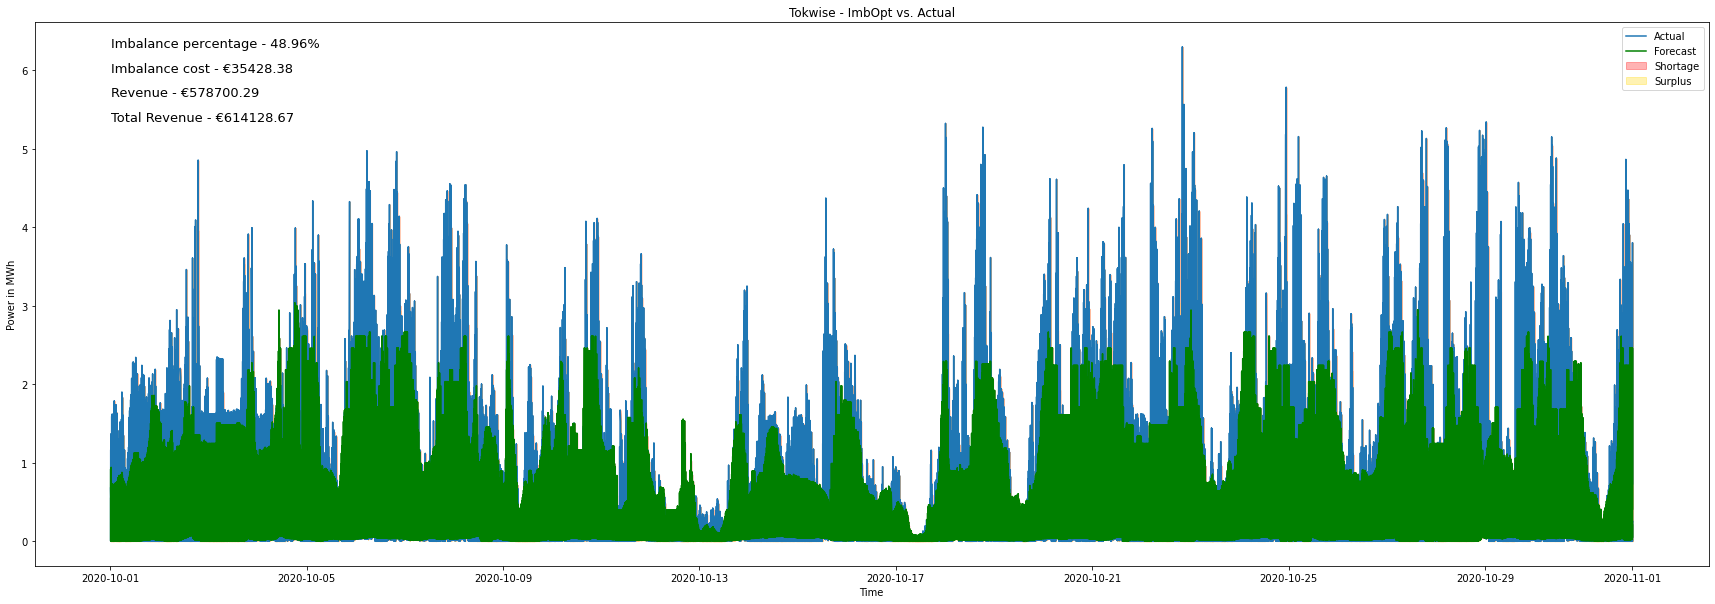

In [210]:
polt(test_df['actual'].values, test_df['Tokwise - ImbOpt'].values,time, 'Tokwise - ImbOpt')

5567.531359474422 -4278.345459680983
13105.524250054588 -2156.875113167869
8381.359864572718 -4627.694727404396
4083.649872 -9317.228716999998
2848.993783 -17928.776003
0.0 0.0
19869.332905 0.0


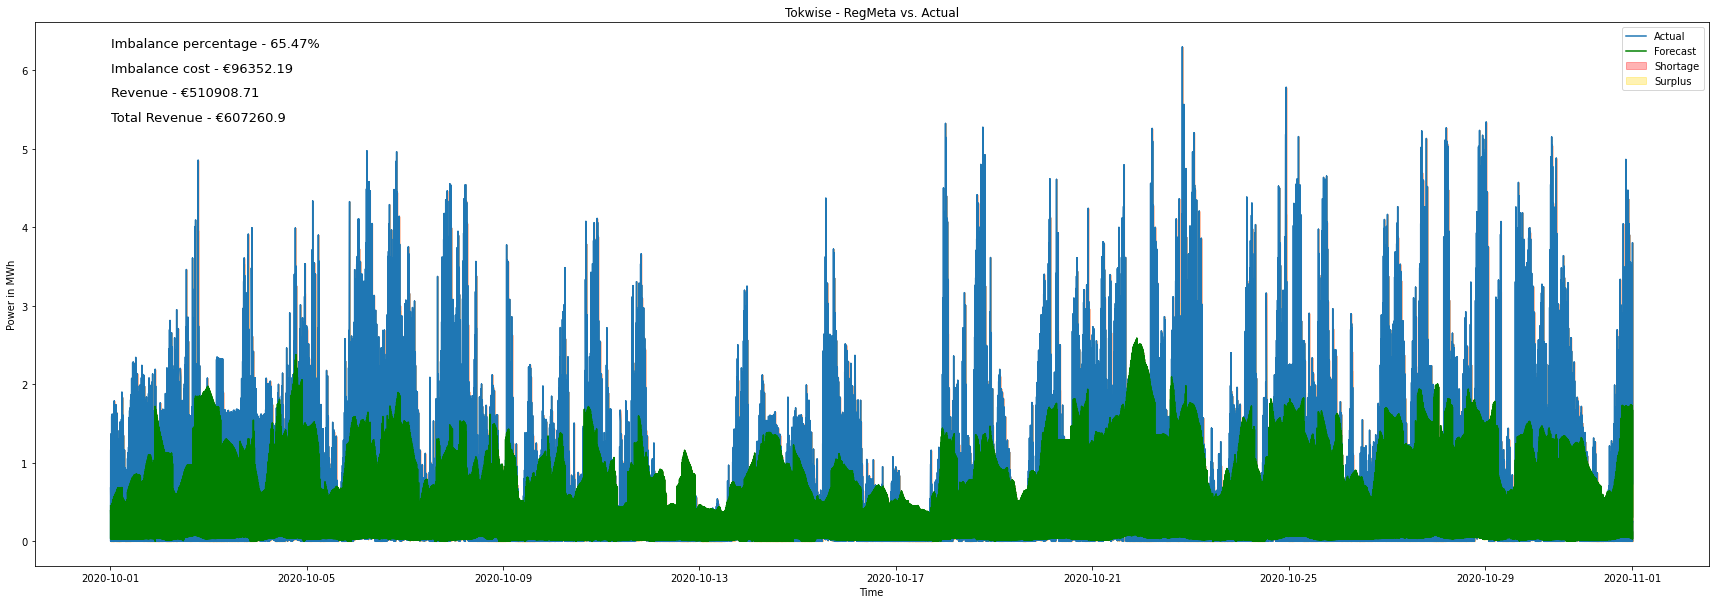

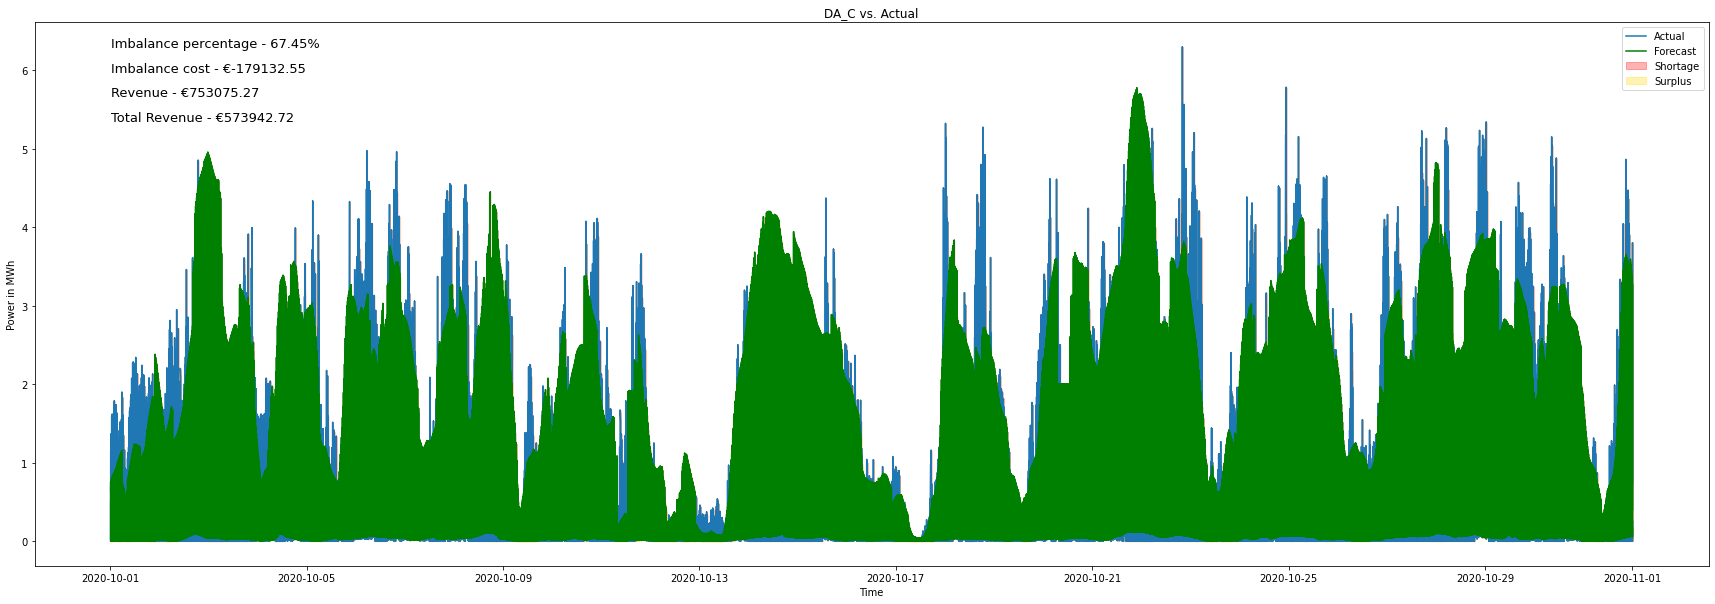

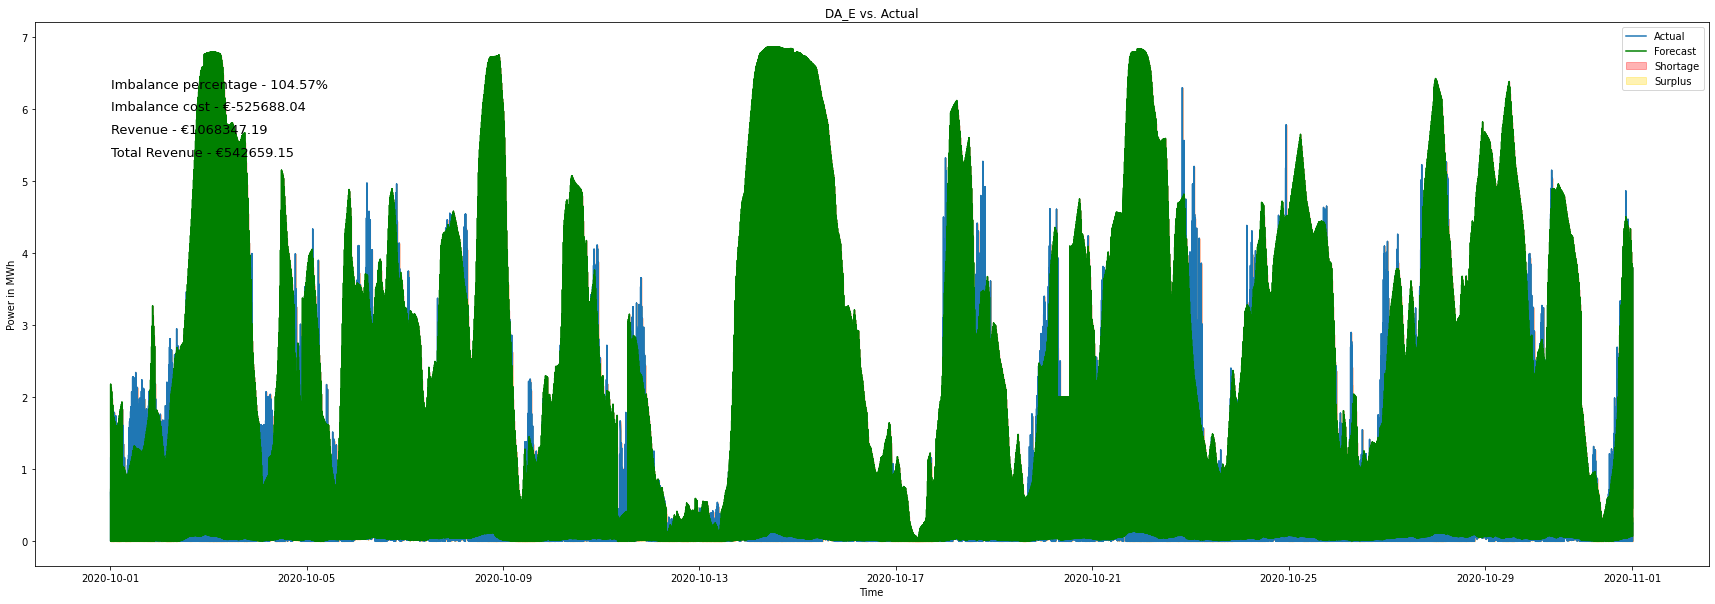

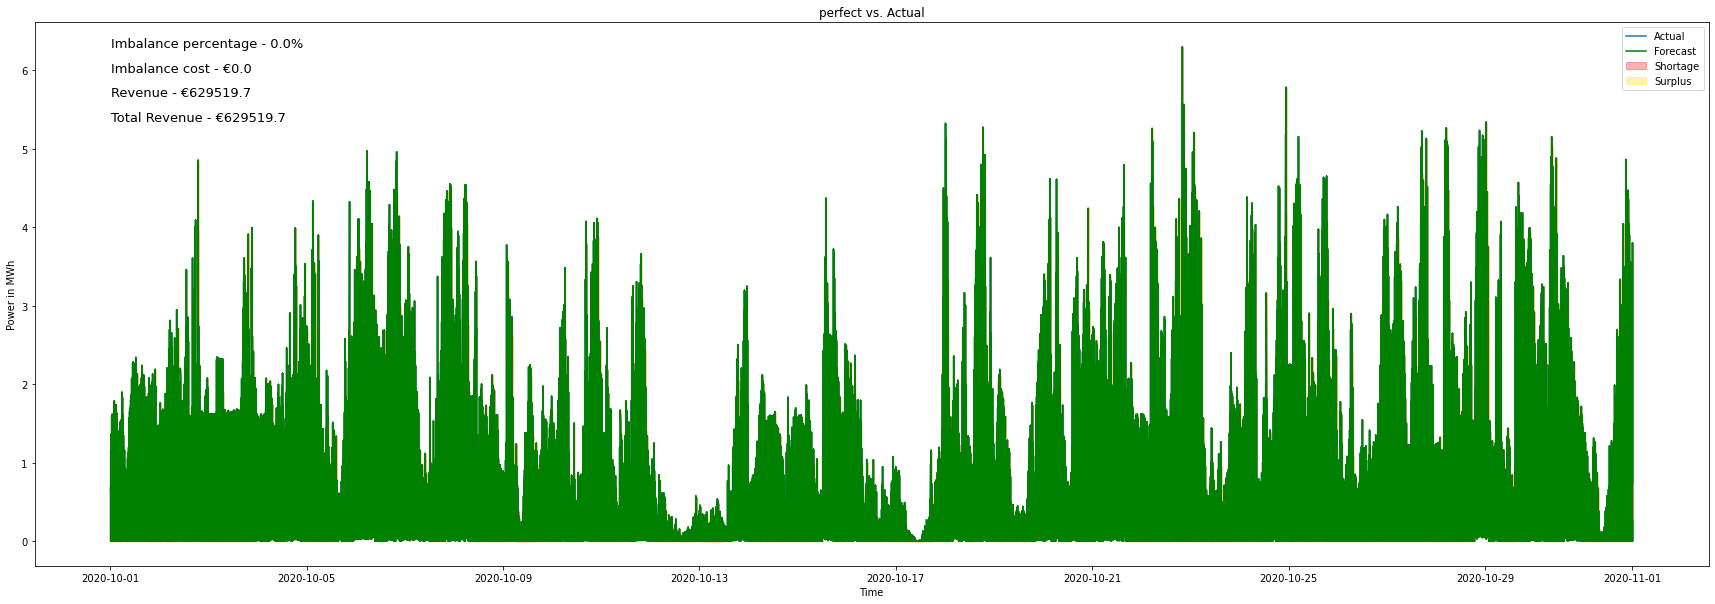

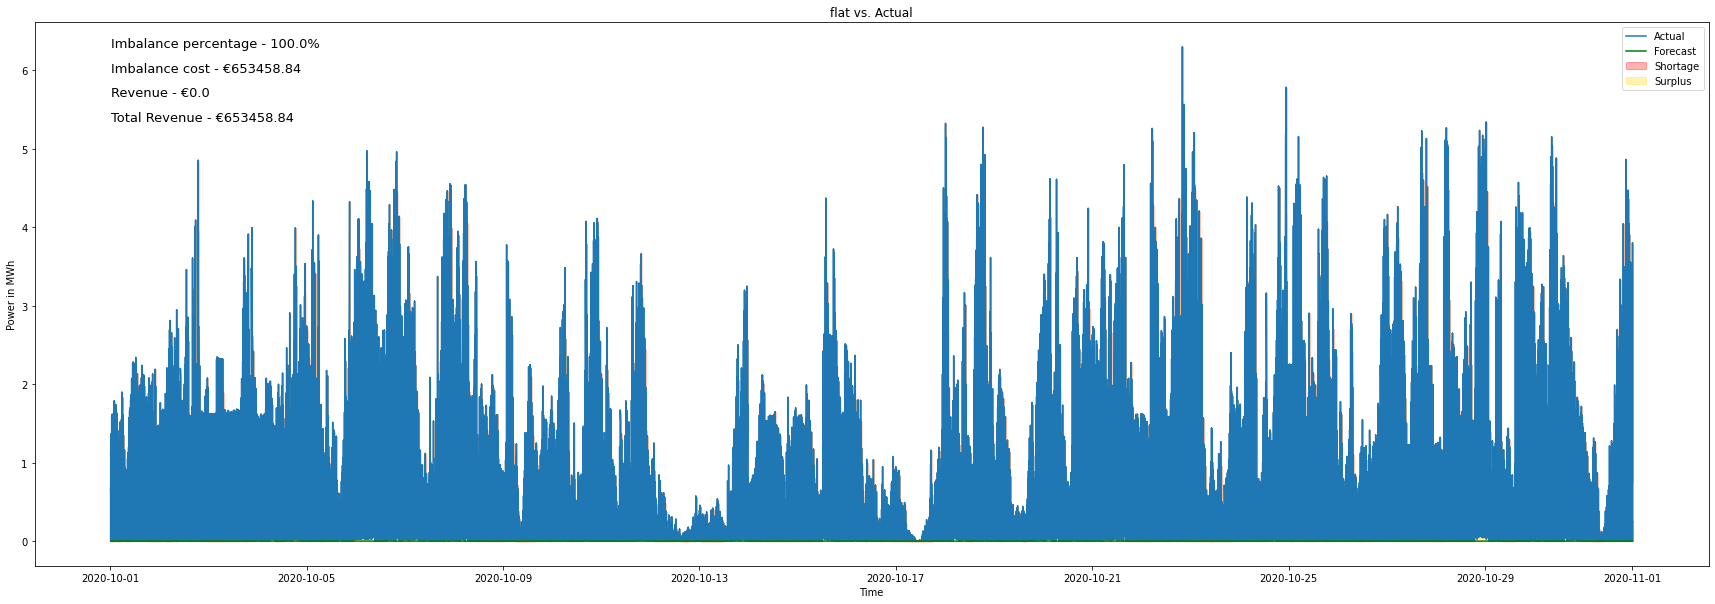

In [205]:
polt(test_df['actual'].values, test_df['Tokwise - ImbOpt'].values,time, 'Tokwise - ImbOpt')
polt(test_df['actual'].values, test_df['Tokwise - RegMetaCust'].values,time, 'Tokwise - RegMetaCust')
polt(test_df['actual'].values, test_df['Tokwise - RegMeta'].values,time, 'Tokwise - RegMeta')
polt(test_df['actual'].values, test_df[features[0]].values,time, features[0])
polt(test_df['actual'].values, test_df[features[1]].values,time, features[1])
polt(test_df['actual'].values, test_df['actual'].values,time, 'perfect')
polt(test_df['actual'].values, test_df['zeros'].values,time, 'flat')


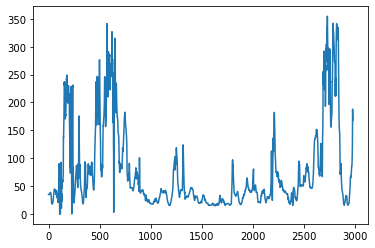

In [223]:
plt.plot(pred)



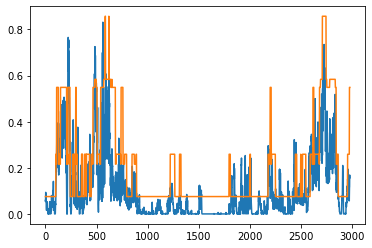

In [156]:
plt.plot(y_test)
#plt.plot((pred_norm - np.min(pred_norm)) * 2)
plt.plot(pred * -150)
#plt.plot(pred_reg)

In [ ]:
X_train

In [180]:
reg.coef_

array([[0.39651156, 0.05217537]])

In [ ]:
data_long

In [166]:
imb(y_test, X_test[:,1])

MemoryError: 

In [ ]:
plt.plot(y_test)
plt.plot(pred)
plt.plot(X_test[:,1])

In [ ]:
len(pred[:,14])

In [ ]:
pred_norm[pred_norm < 0] = 0

In [ ]:
plt.plot(y_test[:,0])
plt.plot(((pred + pred.min())/pred.min()) - ((pred + pred.min())/pred.min()).min())
plt.plot(pred_norm - pred_norm.min())

In [ ]:
plt.plot(y_test[:,254])
#plt.plot(pred[:,14] - pred[:,14].min())
plt.plot(pred_nn[:,254] - pred_nn[:,254].min())

In [ ]:
data_short[['ACTUAL_201988', 'DA_C_201988']][-1350:].plot()

In [ ]:
#plt.plot(y_test)
plt.plot(pred)

In [ ]:
y_test

In [ ]:
plt.plot(X_test.values[:,123])

In [ ]:
np.min(y_test.values[:,64])

In [ ]:
plt.plot(y_test.values[:,64])

In [ ]:
plt.plot(X_test[:,:4])
plt.plot(pred.flatten())

In [ ]:
plt.plot(pred.flatten())

In [ ]:
pred.flatten()

In [ ]:
plt.plot(y_test.flatten())
plt.plot(pred.flatten())

In [ ]:
plt.scatter(pred.flatten(),y_test.flatten())

In [ ]:
len(X_train[:,3])

In [ ]:
len(y_train.flatten())

In [ ]:
plt.scatter(y_test.flatten(),pred.flatten())

In [ ]:
model.weights[0]

In [ ]:
data = pd.read_csv('../data/pgb_sep_nov.csv')[['Period End', 'Actual', 'PGB Wind', 'TW DA']].dropna().reset_index(drop = True)

In [ ]:
pd.read_csv('../data/Imbalance_2020_Poland_30Nov2020.csv')

In [ ]:
price20 = pd.read_csv('../data/Imbalance_2020_Poland_30Nov2020.csv')[['Imbalance settlement period (CET)','+ Imbalance Price [PLN/MWh] - MBA|PL']]

In [ ]:
price19 = pd.read_csv('../data/Imbalance_201901010000-2020.csv')[['Imbalance settlement period (CET)','+ Imbalance Price [EUR/MWh] - MBA|DE-LU']]

In [ ]:
price20 = pd.read_csv('../data/Imbalance_2020_Poland_30Nov2020.csv')[['Imbalance settlement period (CET)','+ Imbalance Price [PLN/MWh] - MBA|PL']]
price20[['Date','Price']].set_index('Date').replace('-',np.nan).dropna().reset_index()

In [ ]:
price20.columns = ['Datetime','Price']
#price19.columns = ['Datetime','Price']

In [ ]:
price20['Datetime'] = price20['Datetime'].apply(lambda x: x[-16:])
price20['Date'] = price20['Datetime'].apply(lambda a: datetime.datetime.strptime(a, '%d.%m.%Y %H:%M'))

In [ ]:
price19['Datetime'] = price19['Datetime'].apply(lambda x: x[-16:])
price19['Date'] = price19['Datetime'].apply(lambda a: datetime.datetime.strptime(a, '%d.%m.%Y %H:%M'))

In [ ]:
price19.append(price20)[['Price', 'Date']].to_csv('../data/german_price.csv', index = False)

In [ ]:
data['Date'] = data['Period End'].apply(lambda a: datetime.datetime.strptime(a, '%d.%m.%Y %H:%M'))

In [ ]:
price = price20[['Date','Price']].set_index('Date').replace('-',np.nan).dropna().reset_index()

In [ ]:
data_15m = data.set_index('Date').drop('Period End', axis = 1).resample('15T').mean().interpolate().reset_index()

In [ ]:
price['Price'].astype(float) * .22

In [ ]:
price['Price']

In [ ]:
price['Date'] = price['Date'] + datetime.timedelta(weeks = 4)

In [ ]:
price[price['Date'] < '2020-10-01']

In [ ]:
data_price = data.merge(price, on = 'Date')

In [ ]:
da_price.columns =['Datetime', 'DA_Price', 'Date']

In [ ]:
data_price = data_price.merge(da_price, on = 'Date')

In [ ]:
data_price['Price'].astype(float) * .22

In [ ]:
data_price[data_price['Date'] > '15-11-2020']

In [ ]:
(DAP>ISP).value_counts()

In [ ]:
pmerge = price.merge(da_price, on = 'Date')

In [ ]:
pmerge['Price'] = pmerge['Price'] * .22

In [ ]:
pmerge[['Price', 'DA_Price']].describe()

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(data_price['Price'].astype(float) * .22)
plt.plot(data_price['DA_Price'].astype(float))

In [ ]:
data_price[data_price['Date'] < '11-01-2020']

In [ ]:
HN = pd.read_csv('../data/HN.csv')

In [ ]:
HN.columns

In [ ]:
ISP = data_price[:1309]['Price'].astype(float).reset_index(drop = True) * .22
ISP_test = data_price[1309:]['Price'].astype(float).reset_index(drop = True) * .22
X_train = HN[:5000][['External DA', 'V2 Day-ahead']].reset_index(drop = True)/HN['Actual'].max()
y_train = HN[:5000]['Actual'].reset_index(drop = True)/HN['Actual'].max()
X_test = HN[5000:][['External DA', 'V2 Day-ahead']]/HN['Actual'].max()
y_test = HN[5000:]['Actual']/HN['Actual'].max()

In [ ]:
class custom_metric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            
            err = (target[i] - approx[i])
            
            if err < 0:
                err = err
            else:
                err = err
            error_sum += err * ISP[i]
        return error_sum, weight_sum
class custom_loss(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)
        
        result = []
        for index in range(len(targets)):
            der1 = (targets[index] - approxes[index]) 
            if der1 < 0:
                der1 = der1
            else:
                der1 = der1
            der1 = der1 * ISP[index]
            der2 = -1

            if weights is not None:
                der1 *= weights[index]
                der2 *= weights[index]

            result.append((der1, der2))
        return result

In [ ]:
import keras.backend as K

In [ ]:
def imb_loss(y_true, y_pred):
    error = (y_true - y_pred) * data_price['Actual'].max()
    error_ISP = error * ISP
    loss = K.sum(error_ISP)
    return loss

In [ ]:
def build_model(input_shape):
    model = keras.Sequential([
    layers.Dense(units = 2
                 , activation= 'relu'
                 , input_shape=input_shape
                 , kernel_initializer = 'GlorotNormal'), 
    layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(0.001)
  
    model.compile(
                loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model

In [ ]:
model = build_model([X_train.shape[1]])


model.fit(X_train, y_train,
          epochs=600, validation_split = 0.15, verbose = 1)

In [ ]:
pred = model.predict(X_test).reshape(-1,)

In [ ]:
pred = pred/np.max(pred)

In [ ]:
pred = pred - np.min(pred)

In [ ]:
X_test.max().values

In [ ]:
print(imb(y_test * data_price['Actual'].max(),pred * .65 *  data_price['Actual'].max()))
print(((y_test.values * data_price['Actual'].max() - pred * .65 *  data_price['Actual'].max()) ).sum())
polt(y_test.values * data_price['Actual'].max(),pred * .65 * data_price['Actual'].max())
#plt.plot(X_test['PGB Wind'].values * data_price['Actual'].max())

In [ ]:
X_test.plot(figsize = (30,10))
plt.plot(y_test)

In [ ]:
for i in X_test.columns:
    print(imb(y_test, X_test[i]))

In [ ]:
y_test

In [ ]:
imb(y_test, HN[5000:]['Average DA']/HN['Actual'].max())

In [ ]:
print(imb(y_test,pred))
print(((y_test.values - pred) * ISP_test).sum())
polt(y_test.values,pred)
#plt.plot(X_test['PGB Wind'].values)

In [ ]:
slicer = 400

In [ ]:
cut = 1100

In [ ]:
regr_cust = CatBoostRegressor(iterations=1,learning_rate=0.1,depth=10, verbose = 500)


regr_cust.fit(X_train[cut:], y_train[cut:])


regr_cust.fit(X_train[:cut], y_train[:cut])

pred_cust = regr_cust.predict(X_test)


pred_cust[pred_cust < 0]=0

regr = CatBoostRegressor(iterations=1,learning_rate=0.1,depth=10, verbose = 500)

regr.fit(X_train, y_train)

pred = regr.predict(X_test)


pred[pred < 0]=0

print(imb(y_test,pred))
polt(y_test.values,pred)
plt.plot(X_test['PGB Wind'].values)
print(imb(y_test,pred_cust))
polt(y_test.values,pred_cust)
plt.plot(X_test['PGB Wind'].values)

In [ ]:
X_test['Actual'] = y_test

In [ ]:
X_test['Prediction'] = pred_cust

In [ ]:
X_test['Date'] = (data[1309:]['Date'])

In [ ]:
res = X_test 

In [ ]:
merge = da_price.merge(X_test, on = 'Date')

In [ ]:
merge.columns = ['Datetime','DA_Price','Date','PGB current', 'Tokwise current',  'Actual', 'MetaForecast']

In [ ]:
merge['MetaForecast_aug'] = merge['MetaForecast'] 

In [ ]:
merge['MetaForecast_aug'][merge['PGB current'] == 0] = 0

In [ ]:
merge['Zero'] = 0

In [ ]:
merge = merge.merge(price, on = 'Date')

In [ ]:
merge['Price'] = merge['Price'].values.astype(float) * .22

In [ ]:
for i in ['PGB current', 'Tokwise current', 'MetaForecast','Zero', 'Actual']:

    pos = list()
    neg = list()
    
    error =  (merge['Actual'] - merge[i])
    cost = error * merge['Price'].values.astype(float)
    
    
    cost_pos = cost[cost > 0]
    cost_neg = cost[cost < 0]
    
    for q in range(len(merge)):
        if (merge['Actual'][q] - merge[i][q]) > 0:
            pos.append(merge['Actual'][q])
        else:
            pos.append(merge[i][q])
    for q in range(len(merge)):
        if (merge['Actual'][q] - merge[i][q]) < 0:
            neg.append(merge['Actual'][q])
        else:
            neg.append(merge[i][q])
            
    rev = neg * merge['DA_Price']
            
    plt.figure(figsize = (30,10))
    plt.plot(merge[i], label = i, color = 'green')
    plt.plot(merge['Actual'], label = 'Actual')        
    plt.fill_between(list(merge.index), (pos), (merge['Actual']), color='red', alpha=0.3, label = 'Shortage')
    plt.fill_between(list(merge.index), (neg), (merge['Actual']), color='gold', alpha=0.3, label = 'Surplus')
    plt.text(x = merge.index[0],y = merge['Actual'].max(),fontsize = 13 ,s = 'MAPE - ' +  str(np.round(imb(merge['Actual'], merge[i]) * 100 , 2)) + '%')
    plt.xlabel('Time')
    plt.ylabel('Power in MWh')
    plt.title(i + ' vs. Actual')
    plt.legend()

In [ ]:
i = 'MetaForecast'

In [ ]:
merge = merge.set_index('Date')

In [ ]:
pos = list()
neg = list()

error =  (merge['Actual'] - merge[i])
cost = error * merge['Price'].values.astype(float)


cost_pos = cost[cost > 0]
cost_neg = cost[cost < 0]

for q in range(len(merge)):
    if (merge['Actual'][q] - merge[i][q]) > 0:
        pos.append(merge['Actual'][q])
    else:
        pos.append(merge[i][q])
for q in range(len(merge)):
    if (merge['Actual'][q] - merge[i][q]) < 0:
        neg.append(merge['Actual'][q])
    else:
        neg.append(merge[i][q])
        
rev = neg * merge['DA_Price']
        
plt.figure(figsize = (30,10))
plt.plot(merge[i], label = i, color = 'green')
plt.plot(merge['Actual'], label = 'Actual')   
plt.plot(merge['PGB current'], label = 'PGB current')  
plt.fill_between(list(merge.index), (pos), (merge['Actual']), color='red', alpha=0.3, label = 'Shortage')
plt.fill_between(list(merge.index), (neg), (merge['Actual']), color='gold', alpha=0.3, label = 'Surplus')
plt.fill_between(list(merge.index), (merge[i]), (merge['PGB current']), color='teal', alpha=0.3, label = 'Difference from current provider')
plt.text(x = merge.index[0],y = merge['Actual'].max(),fontsize = 13 ,s = 'MAPE MetaForecast - ' +  str(np.round(imb(merge['Actual'], merge[i]) * 100 , 2)) + '%')
plt.text(x = merge.index[0],y = merge['Actual'].max() - 1,fontsize = 13 ,s = 'MAPE Current - ' +  str(np.round(imb(merge['Actual'], merge['PGB current']) * 100 , 2)) + '%')
plt.xlabel('Time')
plt.ylabel('Power in MWh')
plt.title(i + ' vs. Actual')
plt.legend()

In [176]:
wind[wind['date'] == '2015-12-31 23:00:00']

TS_UTC_VON   KW_ID   ACTUAL  EisMan    DA_C  DA_E  wind  \
3838932   2015-12-31 23:00:00  201301  1147.20     NaN  1223.0   NaN     1   
7600227   2015-12-31 23:00:00  200895   151.00     NaN   154.0   NaN     1   
7691768   2015-12-31 23:00:00  200168   192.00     NaN   163.0   NaN     1   
7691769   2015-12-31 23:00:00  200188   151.80     NaN   170.0   NaN     1   
7691772   2015-12-31 23:00:00  200958   208.00     NaN   318.0   NaN     1   
...                       ...     ...      ...     ...     ...   ...   ...   
57557847  2015-12-31 23:00:00  201376   984.00     NaN  1965.0   NaN     1   
57698739  2015-12-31 23:00:00  201040    78.00     NaN    90.0   NaN     1   
57835039  2015-12-31 23:00:00  200872    92.40     NaN    80.0   NaN     1   
58538448  2015-12-31 23:00:00  200266   227.52     NaN    72.0   NaN     1   
58850021  2015-12-31 23:00:00  200141   700.00     NaN   737.0   NaN     1   

          solar                date  year  
3838932       0 2015-12-31 23:00:00  2015  
7600227       0 2015-12-31 23:00:00  2015  
7691768       0 2015-12-31 23:00:00  2015  
7691769       0 2015-12-31 23:00:00  2015  
7691772       0 2015-12-31 23:00:00  2015  
...         ...                 ...   ...  
57557847      0 2015-12-31 23:00:00  2015  
57698739      0 2015-12-31 23:00:00  2015  
57835039      0 2015-12-31 23:00:00  2015  
58538448      0 2015-12-31 23:00:00  2015  
58850021      0 2015-12-31 23:00:00  2015  

[148 rows x 10 columns]

In [188]:
price

DA     ISP                Date
0       23.86  -47.43 2016-01-01 00:15:00
1       23.86   78.73 2016-01-01 00:30:00
2       23.86   45.75 2016-01-01 00:45:00
3       23.86   37.41 2016-01-01 01:00:00
4       22.39   65.72 2016-01-01 01:15:00
...       ...     ...                 ...
169531  25.84  126.01 2020-10-31 23:00:00
169532  22.74    2.45 2020-10-31 23:15:00
169533  22.74   69.80 2020-10-31 23:30:00
169534  22.74   49.52 2020-10-31 23:45:00
169535  22.74   38.65 2020-11-01 00:00:00

[169536 rows x 3 columns]

In [187]:
solar['month'] = solar['date'].dt.month